### `01: The linear algebra of dense layers`
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.

![Alt Text](images/06.png)

The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

- Initialize `weights1` as a variable using a 3x2 tensor of ones.
- Compute the product of `borrower_features` by `weights1` using matrix multiplication.
- Use a sigmoid activation function to transform `product1 + bias1`.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import Variable, ones, matmul, keras

float32 = tf.float32
borrower_features = np.array([[ 2.,  2., 43.]], dtype='float32')
borrower_features.shape

(1, 3)

- Initialize weights2 as a variable using a 2x1 tensor of ones.
- Compute the product of dense1 by weights2 using matrix multiplication.
-  Use a sigmoid activation function to transform product2 + bias2.

In [3]:
# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2, 1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1, weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


Excellent work! Our model produces predicted values in the interval between 0 and 1. For the example we considered, the actual value was 1 and the predicted value was a probability between 0 and 1. This, of course, is not meaningful, since we have not yet trained our model's parameters.



### `02: The low-level approach with multiple examples`
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

![Alt Text](images/07.png)

Note that matmul() and keras() have been imported from tensorflow.

- Compute `products1` by matrix multiplying the features tensor by the weights.
- Use a sigmoid activation function to transform `products1 + bias1`.
- Print the shapes of `borrower_features`, `weights1`, `bias1`, and `dense1`.

In [4]:
weights1 = tf.constant([[-0.6 ,  0.6 ],
                        [ 0.8 , -0.3 ],
                        [-0.09, -0.08]], dtype=float32)

borrower_features = tf.constant([[ 3.,  3., 23.],
                                 [ 2.,  1., 24.],
                                 [ 1.,  1., 49.],
                                 [ 1.,  1., 49.],
                                 [ 2.,  1., 29.]], dtype=float32)

bias1 = tf.constant([0.1])
bias1

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.1], dtype=float32)>

In [5]:
# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features, weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1 + bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (5, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  (1,)

 shape of dense1:  (5, 2)


Good job! Note that our input data, borrower_features, is 5x3 because it consists of 5 examples for 3 features. The shape of weights1 is 3x2, as it was in the previous exercise, since it does not depend on the number of examples. Additionally, bias1 is a scalar. Finally, dense1 is 5x2, which means that we can multiply it by the following set of weights, weights2, which we defined to be 2x1 in the previous exercise.



### `03: Using the dense layer operation` 

We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

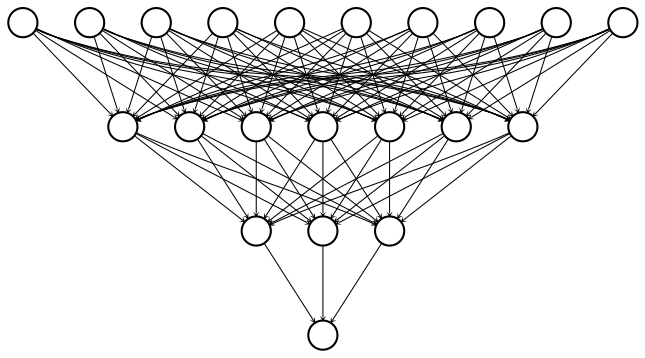


To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

- Set `dense1` to be a dense layer with 7 output nodes and a sigmoid activation function.
- Define `dense2` to be dense layer with 3 output nodes and a sigmoid activation function.
- Define `predictions` to be a dense layer with 1 output node and a sigmoid activation function.
- Print the shapes of `dense1`, `dense2`, and `predictions` in that order using the `.shape` method. Why does each of these tensors have 100 rows?

In [6]:
borrower_features = np.load("datasets/borrower_features.npy")
borrower_features = tf.constant(borrower_features, dtype=float32)
borrower_features.shape

TensorShape([100, 10])

In [7]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3,activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)


 shape of dense1:  (100, 7)

 shape of dense2:  (100, 3)

 shape of predictions:  (100, 1)


Great work! With just 8 lines of code, you were able to define 2 dense hidden layers and an output layer. This is the advantage of using high-level operations in tensorflow. Note that each layer has 100 rows because the input data contains 100 examples.



### `04: Binary classification problems`
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

- Define `inputs` as a 32-bit floating point constant tensor using `bill_amounts`.
- Set `dense1` to be a dense layer with 3 output nodes and a `relu` activation function.
- Set `dense2` to be a dense layer with 2 output nodes and a `relu` activation function.
- Set the output layer to be a dense layer with a single output node and a `sigmoid` activation function.

In [8]:
from tensorflow import constant
bill_amounts = np.load("datasets/bill_amounts.npy")
default = np.load("datasets/default.npy")

In [9]:
# Construct input layer from features
inputs = constant(bill_amounts, float32)

# Define first dense layer
dense1 = keras.layers.Dense(3, activation='relu')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(2, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print error for first five examples
error = default[:5] - outputs.numpy()[:5]
print(error)

[[-0.5]
 [-0.5]
 [ 0. ]
 [ 0. ]
 [-0.5]]


Excellent work! If you run the code several times, you'll notice that the errors change each time. This is because you're using an untrained model with randomly initialized parameters. Furthermore, the errors fall on the interval between -1 and 1 because default is a binary variable that takes on values of 0 and 1 and outputs is a probability between 0 and 1.



### `05: Multiclass classification problems`

In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

- Define the input layer as a 32-bit constant tensor using `borrower_features`.
- Set the first dense layer to have 10 output nodes and a `sigmoid` activation function.
- Set the second dense layer to have 8 output nodes and a rectified linear unit activation function.
- Set the output layer to have 6 output nodes and the appropriate activation function.

In [10]:
borrower_features = np.load("datasets/borrower_features_2.npy")

In [11]:
# Construct input layer from borrower features
inputs = constant(borrower_features, float32)

# Define first dense layer
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)

# Define second dense layer
dense2 = keras.layers.Dense(8, activation='relu')(dense1)

# Define output layer
outputs = keras.layers.Dense(6, activation='softmax')(dense2)

# Print first five predictions
print(outputs.numpy()[:5])

[[0.0823203  0.02045511 0.04831081 0.6855425  0.08243176 0.08093957]
 [0.13835736 0.01672211 0.05089002 0.6010366  0.0536227  0.1393712 ]
 [0.0981634  0.06317478 0.08856399 0.5140787  0.12200161 0.11401758]
 [0.1878859  0.04475877 0.08879    0.3740729  0.12354578 0.1809467 ]
 [0.09314955 0.01616547 0.04258399 0.6916919  0.05844935 0.09795977]]


Great work! Notice that each row of outputs sums to one. This is because a row contains the predicted class probabilities for one example. As with the previous exercise, our predictions are not yet informative, since we are using an untrained model with randomly initialized parameters. This is why the model tends to assign similar probabilities to each class.

### `06: The dangers of local minima`
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.

![Alt Text](images/08.png)


In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). First, you will use x_1, which is a variable with an initial value of 6.0. Second, you will use x_2, which is a variable with an initial value of 0.3. Note that loss_function() has been defined and is available.

- Set `opt` to use the stochastic gradient descent optimizer (SGD) with a learning rate of 0.01.
- Perform minimization using the loss function, `loss_function()`, and the variable with an initial value of 6.0, `x_1`.
- Perform minimization using the loss function, `loss_function()`, and the variable with an initial value of 0.3, `x_2`.
- Print `x_1` and `x_2` as `numpy` arrays and check whether the values differ. These are the minima that the algorithm identified.


In [12]:
import math
from numpy import pi
from tensorflow import divide

In [13]:
def loss_function(x):
	return 4.0*math.cos(x-1)+divide(math.cos(2.0*pi*x),x)

In [14]:
loss_function(5)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.4145744>

In [15]:
# Initialize x_1 and x_2
x_1 = Variable(6.0,float32)
x_2 = Variable(0.3,float32)

# Define the optimization operation
opt = keras.optimizers.SGD(learning_rate=0.01)

for j in range(100):
	# Perform minimization using the loss function and x_1
	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
	# Perform minimization using the loss function and x_2
	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

6.027515 0.25


Great work! Notice that we used the same optimizer and loss function, but two different initial values. When we started at 6.0 with x_1, we found the global minimum at 4.38, marked by the dot on the right. When we started at 0.3, we stopped around 0.42 with x_2, the local minimum marked by a dot on the far left.

### `07: Avoiding local minima`
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().

![Alt Text](images/08.png)

Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. Furthermore, keras.optimizers.RMSprop() has also been imported for you from tensorflow.

- Set the `opt_1` operation to use a learning rate of 0.01 and a momentum of 0.99.
- Set `opt_2` to use the root mean square propagation (RMS) optimizer with a learning rate of 0.01 and a momentum of 0.00.
- Define the minimization operation for `opt_2`.
- Print `x_1` and `x_2` as `numpy` arrays.

In [16]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,float32)
x_2 = Variable(0.05,float32)

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01 , momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01 , momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

2.744511 0.24999999


Good work! Recall that the global minimum is approximately 4.38. Notice that opt_1 built momentum, bringing x_1 closer to the global minimum. To the contrary, opt_2, which had a momentum parameter of 0.0, got stuck in the local minimum on the left.

### `08: Initialization in TensorFlow`
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. Several operations have been imported from tensorflow: Variable(), random(), and ones().

- Initialize the layer 1 weights, `w1`, as a `Variable()` with shape `[23, 7]`, drawn from a normal distribution.
- Initialize the layer 1 bias using ones.
- Use a draw from the normal distribution to initialize `w2` as a `Variable()` with shape `[7, 1]`.
- Define `b2` as a `Variable()` and set its initial value to 0.0.

In [20]:
from numpy import random

In [21]:
# Define the layer 1 weights
w1 = Variable(random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(ones([7]))

# Define the layer 2 weights
w2 = Variable(random.normal([7, 1]))

# Define the layer 2 bias
b2 = Variable(ones([0]))

Excellent work! In the next exercise, you will start where we've ended and will finish constructing the neural network.



### `09: Defining the model and loss function`
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as 
, where 
 is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

- Apply a rectified linear unit activation function to the first layer.
- Apply 25% dropout to `layer1`.
- Pass the target, `targets`, and the predicted values, `predictions`, to the cross entropy loss function.

In [22]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout rate of 0.25
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

Nice work! One of the benefits of using tensorflow is that you have the option to customize models down to the linear algebraic-level, as we've shown in the last two exercises. If you print w1, you can see that the objects we're working with are simply tensors.



### `10: Training neural networks with TensorFlow`
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

- Set the optimizer to perform minimization.
- Add the four trainable variables to `var_list` in the order in which they appear as arguments to `loss_function()`.
- Use the model and `test_features` to predict the values for `test_targets`.

In [39]:
from pandas import crosstab, DataFrame
from seaborn import heatmap
import matplotlib.pyplot as plt


In [40]:
def confusion_matrix(default, model_predictions):
	df = DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
	confusion_matrix = crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
	heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
	plt.show()

In [96]:
test_targets = tf.constant(np.load("datasets/test_targets.npy"), dtype=tf.float32)
test_features = tf.constant(np.load("datasets/test_features.npy"), dtype=tf.float32)
borrower_features = tf.constant(np.load("datasets/borrower_features.npy"), dtype=tf.float32)
default = tf.constant(np.load("datasets/default_v2.npy"), dtype=tf.float32)


In [97]:
w1= tf.Variable(np.array([[ 2.4435377 ,  0.6532978 , -2.0876322 , -0.6465399 ,  0.50398946,
        -0.6622369 ,  2.248099  ],
       [-0.6057031 , -0.74135935,  2.5471828 ,  2.9152145 , -1.3031693 ,
         0.8121961 , -0.06042745],
       [-1.4342147 ,  1.987995  ,  0.46523282,  1.1759586 ,  0.43213284,
        -0.3314867 ,  0.3673103 ],
       [-2.0169213 ,  0.75370973,  2.0362077 , -0.9722697 , -0.90286547,
        -0.46412855,  0.73538285],
       [ 0.4028158 , -1.0634764 , -0.69183266,  1.0082972 , -0.1223945 ,
        -0.67528254, -1.3772862 ],
       [ 0.09137809, -0.7528797 , -0.16444235,  0.257028  , -0.81907284,
         1.4698758 , -0.9347897 ],
       [ 0.26381123, -0.9540834 ,  0.52078825, -0.8119896 ,  0.03201316,
         2.0273645 , -1.6015768 ],
       [-0.13008343,  0.75125885, -1.1612765 , -0.19919561, -0.10818551,
         1.4675983 , -0.5593607 ],
       [-0.63245237,  3.5221422 ,  0.51096684, -0.5864398 ,  0.9112978 ,
         0.34698516,  0.68189377],
       [ 0.41752422,  0.7064977 , -1.0978483 , -0.7023961 ,  0.79573596,
         0.5765105 ,  0.5866237 ],
       [ 0.44239658,  0.06016769,  1.5716101 ,  0.65556014,  0.76095665,
         0.5687989 ,  1.1920937 ],
       [-0.68715763, -0.1728628 ,  1.4736586 , -0.4240413 ,  0.48358986,
         0.8436072 , -0.14853318],
       [ 1.6009874 ,  0.41357717,  0.68890846,  0.83247167, -0.00393822,
         0.29737377,  0.20552601],
       [-1.137845  , -0.02462507,  0.7824456 ,  1.013908  ,  1.3491129 ,
         1.552934  , -0.12183756],
       [-0.3266763 ,  2.2627    ,  1.4670117 , -0.6878452 , -0.5917342 ,
        -0.5329395 , -0.20593391],
       [ 0.55576605,  2.364314  ,  1.6994927 , -0.724152  , -0.2852429 ,
         0.1478058 , -0.80708194],
       [ 1.618923  ,  0.14479114, -1.111939  ,  0.16476874,  1.1102928 ,
        -1.3003356 ,  0.14524043],
       [ 0.8061737 ,  0.65021497,  1.404869  ,  2.3160765 , -0.5442242 ,
        -0.5231445 ,  0.90839577],
       [-0.14611603, -0.8277071 ,  0.66987085,  0.09163713, -0.33766454,
         2.1436663 ,  0.4740364 ],
       [-0.40199128,  0.86705554, -2.1632981 , -0.3115556 , -0.98251456,
        -0.10797349,  1.6352255 ],
       [ 0.23678602,  0.51027703, -1.8715134 , -0.66790223,  0.21952134,
         0.4172406 , -1.2710783 ],
       [-0.02490104, -0.5918932 ,  1.2865447 , -0.04981803, -1.7857966 ,
        -0.2095459 , -1.2845048 ],
       [-0.5743803 , -0.14933696, -2.2613177 , -1.0723772 ,  2.3046598 ,
        -1.5037003 ,  0.6880282 ]]), dtype=float32) 

w2= tf.Variable(np.array([[ 0.8205525 ],
       [ 0.41013834],
       [-1.1908278 ],
       [-1.5474229 ],
       [ 0.8174632 ],
       [-1.4407537 ],
       [-0.9222677 ]]), dtype=float32)

b1 = tf.Variable(np.array([-0.7341992 , -0.38519704, -0.9991661 , -0.42893964,  0.86850995,
        2.714162  ,  1.475798  ]), dtype=float32)

b2 = tf.Variable(np.array([-1.2979275]), dtype=float32)

In [98]:
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
    # Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

In [99]:
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

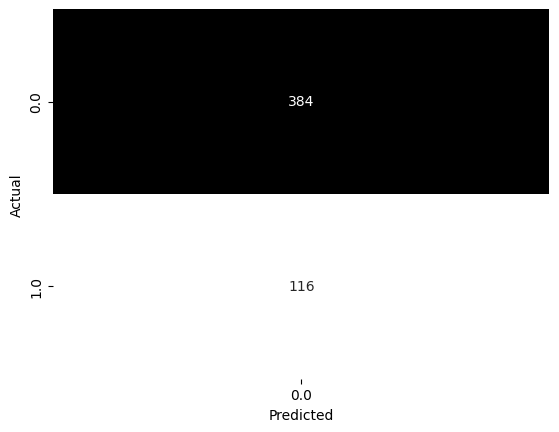

In [100]:
# Train the model
for j in range(100):
    # Complete the optimizer
    opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model using test features
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

Nice work! The diagram shown is called a ``confusion matrix.'' The diagonal elements show the number of correct predictions. The off-diagonal elements show the number of incorrect predictions. We can see that the model performs reasonably-well, but does so by overpredicting non-default. This suggests that we may need to train longer, tune the model's hyperparameters, or change the model's architecture.

